In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import calendar


In [2]:
path = "tamsat data.csv" 

df = pd.read_csv(path, parse_dates=['Date'], dayfirst=True)
df.head()

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/13/1983' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/14/1983' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/15/1983' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/16/1983' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dateti

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/13/1992' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/14/1992' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/15/1992' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/16/1992' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dateti

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/14/2001' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/15/2001' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/16/2001' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/17/2001' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dateti

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/13/2012' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/14/2012' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/15/2012' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/16/2012' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dateti

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/14/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/15/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/16/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\Administrator\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '10/17/2022' in MM/DD/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_dateti

,Date,Rainfall_mm
0,1983-01-01,0.19
1,1983-02-01,0.08
2,1983-03-01,0.21
3,1983-04-01,1.09
4,1983-05-01,0.55


In [3]:
df

,Date,Rainfall_mm
0,1983-01-01,0.19
1,1983-02-01,0.08
2,1983-03-01,0.21
3,1983-04-01,1.09
4,1983-05-01,0.55
...,...,...
14664,2023-02-24,0.09
14665,2023-02-25,0.90
14666,2023-02-26,0.35
14667,2023-02-27,0.91


In [4]:
def get_date_details(x):
    x = pd.Timestamp(x)
    rainy = [4, 5, 6, 11, 12]
    if x.month in rainy:
        season = 'RAINY'
    else:
        season = 'DRY'

        
    return [x.year, x.month, x.day, x.day_of_year, season]

In [5]:
dates = list(df.Date.apply(lambda x: get_date_details(x)).values)
year = [i[0] for i in dates]
month = [i[1] for i in dates]
day = [i[2] for i in dates]
day_of_year = [i[3] for i in dates]
season = [i[4] for i in dates]


In [6]:
df.insert(1, 'year', year)
df.insert(2, 'month', month)
df.insert(3, 'date', day)
df.insert(4, 'day_of_year', day_of_year)
df.insert(5, 'season', season)



In [7]:
df

,Date,year,month,date,day_of_year,season,Rainfall_mm
0,1983-01-01,1983,1,1,1,DRY,0.19
1,1983-02-01,1983,2,1,32,DRY,0.08
2,1983-03-01,1983,3,1,60,DRY,0.21
3,1983-04-01,1983,4,1,91,RAINY,1.09
4,1983-05-01,1983,5,1,121,RAINY,0.55
...,...,...,...,...,...,...,...
14664,2023-02-24,2023,2,24,55,DRY,0.09
14665,2023-02-25,2023,2,25,56,DRY,0.90
14666,2023-02-26,2023,2,26,57,DRY,0.35
14667,2023-02-27,2023,2,27,58,DRY,0.91


In [8]:
df[df.year>2000].head(50)

,Date,year,month,date,day_of_year,season,Rainfall_mm
6575,2001-01-01,2001,1,1,1,DRY,0.34
6576,2001-02-01,2001,2,1,32,DRY,0.40
6577,2001-03-01,2001,3,1,60,DRY,0.90
6578,2001-04-01,2001,4,1,91,RAINY,1.87
6579,2001-05-01,2001,5,1,121,RAINY,3.45
6580,2001-06-01,2001,6,1,152,RAINY,2.48
6581,2001-07-01,2001,7,1,182,DRY,1.30
6582,2001-08-01,2001,8,1,213,DRY,2.34
6583,2001-09-01,2001,9,1,244,DRY,2.50
6584,2001-10-01,2001,10,1,274,DRY,3.16


In [66]:
path = "rainfallmm.csv"

rain = pd.read_csv(path)
rain

,Year,Month Average,Rainfall - (MM)
0,1991,Jan Average,38.2847
1,1991,Feb Average,12.7492
2,1991,Mar Average,73.3656
3,1991,Apr Average,83.1350
4,1991,May Average,112.2750
...,...,...,...
307,2016,Aug Average,25.5342
308,2016,Sep Average,15.1428
309,2016,Oct Average,40.0055
310,2016,Nov Average,121.9970


In [67]:
def month_to_num(x):
    date_str = f'2000-{x}-21'
    
    timestamp = pd.Timestamp(date_str)
    return timestamp.month



month = rain['Month Average'].str.replace(" Average", '')
month = month.apply(lambda x: month_to_num(x))

rain['Month Average'] = month


In [75]:
rain[]

,Year,Month Average,Rainfall - (MM)
0,1991,1,38.2847
1,1991,2,12.7492
2,1991,3,73.3656
3,1991,4,83.1350
4,1991,5,112.2750
...,...,...,...
307,2016,8,25.5342
308,2016,9,15.1428
309,2016,10,40.0055
310,2016,11,121.9970


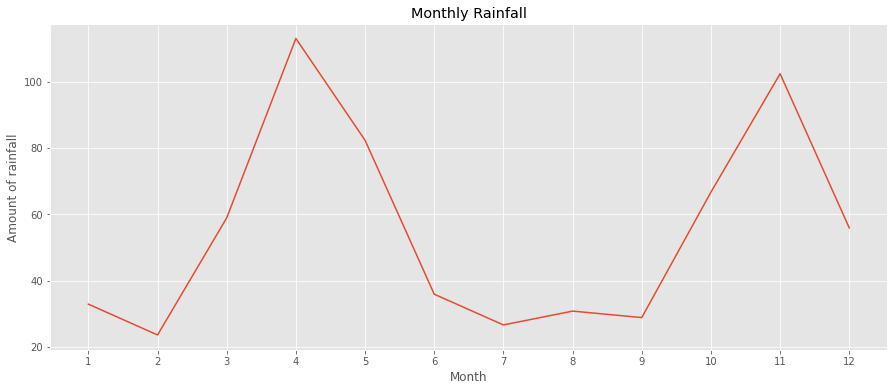

In [166]:
data = rain.groupby('Month Average').mean()['Rainfall - (MM)']




plt.style.use('ggplot')
chart = data.plot(kind = 'line', figsize = (15, 6));
chart.set_title("Monthly Rainfall");
chart.set_xlabel("Month");
chart.set_ylabel("Amount of rainfall");
plt.xticks(list(data.index));

# plt.savefig("charts/TRANSACTION TYPE RANKED BY AMOUNT TRANSACTED.png", bbox_inches='tight')

In [202]:
subset = rain.pivot('Year', 'Month Average', 'Rainfall - (MM)')
subset

Month Average,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1991,38.28470,12.74920,73.3656,83.1350,112.2750,33.6106,36.6575,32.8066,18.31840,41.2266,60.2294,53.42320
1992,10.24910,15.91250,17.0754,119.9190,80.6001,30.0842,35.1079,28.0127,24.31210,47.1624,106.8240,98.41720
1993,80.93180,53.66750,24.0511,77.5293,110.6640,50.2024,14.9912,21.9237,15.61030,42.0606,75.1036,40.12320
1994,6.64417,17.62020,47.8114,111.0380,82.2793,33.7607,44.5223,31.9213,20.17740,69.6349,168.3970,54.45300
1995,10.57990,37.30850,69.4802,150.3580,66.9476,23.5026,27.0207,32.2454,30.57470,87.7315,72.5827,43.81250
1996,24.30530,27.96050,74.9097,71.0857,85.9180,50.8206,33.8330,25.6055,23.94950,19.2856,85.8530,6.98666
1997,8.74094,1.15765,45.8383,188.3230,63.3745,46.6663,29.0068,28.8858,7.70611,179.6690,247.0810,116.06200
1998,76.28710,59.96950,50.1806,115.3340,149.3050,69.6817,36.8900,29.2989,22.47750,30.0269,72.0040,12.86530
1999,17.41850,3.90971,85.2266,95.0840,56.7194,30.8994,34.1242,37.8536,22.05810,62.4518,105.1640,46.18160


subset = rain[(rain["Month Average"] == 1)]
subset['Rainfall - (MM)'].plot()

In [205]:
(subset)

Month Average,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1991,38.28470,12.74920,73.3656,83.1350,112.2750,33.6106,36.6575,32.8066,18.31840,41.2266,60.2294,53.42320
1992,10.24910,15.91250,17.0754,119.9190,80.6001,30.0842,35.1079,28.0127,24.31210,47.1624,106.8240,98.41720
1993,80.93180,53.66750,24.0511,77.5293,110.6640,50.2024,14.9912,21.9237,15.61030,42.0606,75.1036,40.12320
1994,6.64417,17.62020,47.8114,111.0380,82.2793,33.7607,44.5223,31.9213,20.17740,69.6349,168.3970,54.45300
1995,10.57990,37.30850,69.4802,150.3580,66.9476,23.5026,27.0207,32.2454,30.57470,87.7315,72.5827,43.81250
1996,24.30530,27.96050,74.9097,71.0857,85.9180,50.8206,33.8330,25.6055,23.94950,19.2856,85.8530,6.98666
1997,8.74094,1.15765,45.8383,188.3230,63.3745,46.6663,29.0068,28.8858,7.70611,179.6690,247.0810,116.06200
1998,76.28710,59.96950,50.1806,115.3340,149.3050,69.6817,36.8900,29.2989,22.47750,30.0269,72.0040,12.86530
1999,17.41850,3.90971,85.2266,95.0840,56.7194,30.8994,34.1242,37.8536,22.05810,62.4518,105.1640,46.18160


In [193]:
x = np.array(subset[[4, 5]])
y = np.array(subset[7])



linear = linear_model.LinearRegression()


# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

# linear.fit(x_train, y_train)
# acc = linear.score(x_test, y_test)

best = 0
acc = 0
trained = 0
while acc < 0.90:
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.3)

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        model = linear
        print(f'Test number {trained}: {acc}')
        best = acc    
    
    trained += 1
    
#     print(f'Test number {trained}: {acc}')



prediction = model.predict(x_test)



for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

Test number 13: 0.007518203979584359
Test number 39: 0.009684262093752616
Test number 53: 0.08125344820009972
Test number 1135: 0.09962253431247658
Test number 12918: 0.10936410083261094
Test number 27586: 0.1199814913134527
Test number 47560: 0.12766166936503054
Test number 240902: 0.14603613185747533
Test number 280440: 0.14781183002869447
Test number 370297: 0.15339812072094727
Test number 447266: 0.1552645042371189
Test number 648344: 0.15740493964056357
Test number 1627852: 0.15740493964056368


KeyboardInterrupt: 

In [194]:
trained

3364852

In [179]:
prediction = model.predict(x_test)

acc = model.score(x_test, y_test)
print(acc)

for x in range(len(prediction)):
    print(f'{prediction[x]} : {x_test[x]} : {y_test[x]}')

0.32948092612274493
18.501579989665252 : [ 4.79105 29.297   21.4966 ] : 26.1649
16.293967673325835 : [17.7408 25.4392 17.5807] : 23.9635
32.164113042700606 : [37.3085 23.5026 32.2454] : 30.5747
48.25788520755664 : [16.8768 27.0903 51.8061] : 45.2457
23.571910963727923 : [18.22   34.905  25.5342] : 15.1428
24.621977176983386 : [ 1.15765 46.6663  28.8858 ] : 7.70611
23.986074582662237 : [ 9.14876 39.8834  27.1292 ] : 21.0991
23.12734367600614 : [28.7876 27.0977 23.6642] : 35.2312


In [162]:
np.array(x_test)

array([[ 1.15765, 46.6663 ],
       [17.7408 , 25.4392 ],
       [ 4.79105, 29.297  ],
       [21.8238 , 70.9284 ],
       [28.0516 , 30.4692 ],
       [25.0993 , 23.7514 ],
       [ 3.90971, 30.8994 ],
       [12.7492 , 33.6106 ]])

In [113]:
subset = rain.pivot('Year', 'Month Average', 'Rainfall - (MM)')
subset

Month Average,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1991,38.28470,12.74920,73.3656,83.1350,112.2750,33.6106,36.6575,32.8066,18.31840,41.2266,60.2294,53.42320
1992,10.24910,15.91250,17.0754,119.9190,80.6001,30.0842,35.1079,28.0127,24.31210,47.1624,106.8240,98.41720
1993,80.93180,53.66750,24.0511,77.5293,110.6640,50.2024,14.9912,21.9237,15.61030,42.0606,75.1036,40.12320
1994,6.64417,17.62020,47.8114,111.0380,82.2793,33.7607,44.5223,31.9213,20.17740,69.6349,168.3970,54.45300
1995,10.57990,37.30850,69.4802,150.3580,66.9476,23.5026,27.0207,32.2454,30.57470,87.7315,72.5827,43.81250
1996,24.30530,27.96050,74.9097,71.0857,85.9180,50.8206,33.8330,25.6055,23.94950,19.2856,85.8530,6.98666
1997,8.74094,1.15765,45.8383,188.3230,63.3745,46.6663,29.0068,28.8858,7.70611,179.6690,247.0810,116.06200
1998,76.28710,59.96950,50.1806,115.3340,149.3050,69.6817,36.8900,29.2989,22.47750,30.0269,72.0040,12.86530
1999,17.41850,3.90971,85.2266,95.0840,56.7194,30.8994,34.1242,37.8536,22.05810,62.4518,105.1640,46.18160


In [123]:
training_data = subset[[1, 2,3]]
training_data

Month Average,1,2,3
Year,,,
1991,38.28470,12.74920,73.3656
1992,10.24910,15.91250,17.0754
1993,80.93180,53.66750,24.0511
1994,6.64417,17.62020,47.8114
1995,10.57990,37.30850,69.4802
1996,24.30530,27.96050,74.9097
1997,8.74094,1.15765,45.8383
1998,76.28710,59.96950,50.1806
1999,17.41850,3.90971,85.2266


In [292]:
def reorder(month):
    data_ = np.array(subset)
    new_subset = []
    year = 1991

    for i in range(len(data_)):
        if i != (len(data_)-1):
            new_dat = [year]
            new_dat.extend(list(data_[i][month:]))
            new_dat.extend(data_[i+1][:month])

    #         data_to_add = [subset[i+1].mean() for i in range(month)]
            new_subset.append(new_dat)

        else:
            new_dat = [year]
            new_dat.extend(list(data_[i][month:]))
            x = [subset[x].mean() for x in range(1, month)]
            new_dat.extend(x)
            new_subset.append(new_dat)

        year+= 1
    col = ['Year']
    col.extend([calendar.month_name[i] for i in range(month, 13)])
    col.extend([calendar.month_name[i] for i in range(1, month)])


    new_df = pd.DataFrame(new_subset, columns = col)
    return new_df

In [295]:
col

['Year', 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15592\1844024859.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  reorder(8).drop('Year', 1).mean().plot()


<AxesSubplot:>

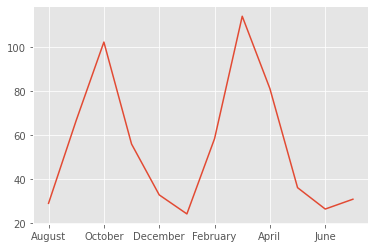

In [296]:
reorder(8).drop('Year', 1).mean().plot()

In [290]:
calendar.month_name[7] 

'July'

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15592\946304700.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = reorder(8).drop('Year', 1).mean().plot()


AttributeError: 'list' object has no attribute 'set_title'

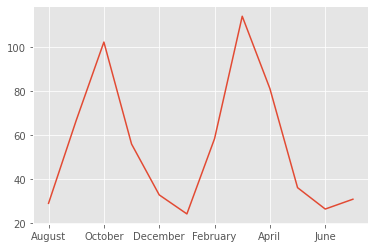

In [299]:
data = reorder(8).drop('Year', 1).mean().plot()




plt.style.use('ggplot')
chart = data.plot(kind = 'line', figsize = (15, 6));
chart.set_title("Monthly Rainfall");
chart.set_xlabel("Month");
chart.set_ylabel("Amount of rainfall");
plt.xticks([str(i) for i in list(data.index)]);

# plt.savefig("charts/TRANSACTION TYPE RANKED BY AMOUNT TRANSACTED.png", bbox_inches='tight')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15592\638966693.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pd.DataFrame(reorder(8).drop('Year', 1).mean()).plot()


<AxesSubplot:>

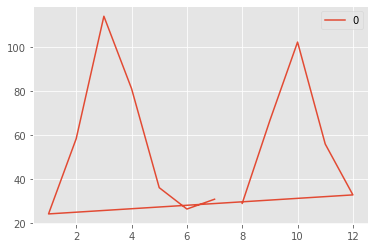

In [283]:
pd.DataFrame(reorder(8).drop('Year', 1).mean()).plot()